**Energy production, total**

Description: Energy production refers to forms of primary energy petroleum (crude oil, natural gas liquids, and 
Oil from nonconventional sources), natural gas, solid fuels (coal, lignite and other derived fuels), and combustible 
renewables and waste— and primary electricity, all converted into tonnes of oil equivalents, counted in tonnes 
of oil equivalent (tonnes oil equivalent).

https://data.worldbank.org/indicator/EG.EGY.PROD.KT.OE

**Oil production, total**

Description: Total amount of crude oil production (tonnes oil equivalent)

https://www.bp.com/en/global/corporate/energy-economics/statistical-review-of-world-energy.html


**Natural gas production, total**

Description: Natural gas production (tonnes oil equivalent)

https://www.bp.com/en/global/corporate/energy-economics/statistical-review-of-world-energy.html

**Hydro electricity production, total**

Description: The amount of hydro power generated during the given year, counted in tonnes of oil equivalent (tonnes oil equivalent)

https://data.worldbank.org/indicator/EG.ELC.HYRO.KH

**Nuclear electricity production, total**

Description: The amount of electricity produced by nuclear power plants in a given year, counted in tonnes of oil equivalent (toe)

https://data.worldbank.org/indicator/EG.ELC.NUCL.KH

In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [260]:
df_total = pd.read_csv('energy_production_total.csv', index_col='country')
df_oil = pd.read_csv('oil_production_total.csv', index_col='country')
df_gas = pd.read_csv('natural_gas_production_total.csv', index_col='country')
df_hydro = pd.read_csv('hydro_power_generation_total.csv', index_col='country')
df_nuclear = pd.read_csv('nuclear_power_generation_total.csv', index_col='country')

**How much information we have**

In [312]:
df_total

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
country,,,,,,,,,,,,,,,,,,,,,
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,883.0,959.0,1050.0,1150.0,1170.0,1190.0,1060.0,1150.0,1250.0,NaN
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,137000.0,143000.0,155000.0,158000.0,167000.0,165000.0,164000.0,162000.0,152000.0,NaN
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43500.0,51400.0,51400.0,57600.0,70900.0,80000.0,95100.0,106000.0,101000.0,NaN
Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,84500.0,81300.0,84300.0,87100.0,84700.0,86200.0,82900.0,82900.0,80800.0,NaN
Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,602.0,738.0,692.0,746.0,861.0,846.0,826.0,797.0,825.0,NaN
Australia,21300.0,22500.0,22900.0,23600.0,25400.0,28300.0,29600.0,31200.0,35300.0,38700.0,...,254000.0,264000.0,264000.0,269000.0,280000.0,282000.0,299000.0,301000.0,311000.0,324000.0
Austria,7360.0,7120.0,7290.0,7750.0,7700.0,8000.0,8150.0,7790.0,7560.0,7360.0,...,9780.0,9820.0,9600.0,9900.0,10100.0,10100.0,10900.0,11200.0,11400.0,11200.0
Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19600.0,19800.0,19800.0,20100.0,27200.0,38100.0,52100.0,58600.0,64600.0,NaN
Bahrain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14900.0,15300.0,15600.0,15800.0,16100.0,16500.0,17000.0,17500.0,17600.0,NaN


In [284]:
df = df_total.rename(columns=lambda x: int(x), inplace=False).T.rename(columns=lambda x: x.strip().lower().replace(" ", "_"))

In [305]:
bin_edges = [1971+10*i for i in range(5)]
bin_edges

[1971, 1981, 1991, 2001, 2011]

In [306]:
bin_names = [str(i)[2]+'0s' for i in bin_edges][:-1]
bin_names

['70s', '80s', '90s', '00s']

In [309]:
df_v2 = df.reset_index().rename(columns = {'index': 'year'})
df_v2['period'] = pd.cut(df_v2['year'], bin_edges, labels=bin_names) 

In [310]:
df_v2.groupby('period').sum()

country,year,albania,algeria,angola,argentina,armenia,australia,austria,azerbaijan,bahrain,...,united_arab_emirates,united_kingdom,united_states,uruguay,uzbekistan,venezuela,vietnam,yemen,zambia,zimbabwe
period,,,,,,,,,,,,,,,,,,,,,
70s,19765,30820.0,616600.0,110400.0,335300.0,0.0,781200.0,76670.0,0.0,113460.0,...,864300.0,1475000.0,14740000.0,5959.0,0.0,1569000.0,170000.0,553.0,36290.0,55280.0
80s,19865,27340.0,860900.0,206900.0,445800.0,272.0,1344600.0,79690.0,39600.0,121210.0,...,839900.0,2253000.0,15840000.0,10910.0,78200.0,1308000.0,218200.0,38489.2,46540.0,72080.0
90s,19965,11709.0,1195000.0,387900.0,716700.0,4889.0,2018000.0,89970.0,166600.0,141900.0,...,1427000.0,2567000.0,16650000.0,11050.0,498600.0,2059000.0,391700.0,172430.0,55180.0,85000.0
00s,18054,8979.0,1266000.0,613400.0,670200.0,6331.0,2594000.0,94220.0,300300.0,131400.0,...,1384000.0,1776000.0,15020000.0,9198.0,467000.0,1690000.0,536600.0,150900.0,53600.0,69080.0


In [294]:
pd.cut(df['pH'], bin_edges, labels=bin_names)

KeyError: 'pH'

In [216]:
df_oil.iloc[:,12:-1].dropna().isnull().sum(axis=1)

country
Algeria                 0
Angola                  0
Argentina               0
Australia               0
Brazil                  0
Brunei                  0
Canada                  0
China                   0
Colombia                0
Congo, Rep.             0
Denmark                 0
Ecuador                 0
Egypt                   0
Gabon                   0
India                   0
Indonesia               0
Iran                    0
Iraq                    0
Italy                   0
Kuwait                  0
Libya                   0
Malaysia                0
Mexico                  0
Nigeria                 0
Norway                  0
Oman                    0
Peru                    0
Qatar                   0
Romania                 0
Saudi Arabia            0
Syria                   0
Trinidad and Tobago     0
Tunisia                 0
United Arab Emirates    0
United Kingdom          0
United States           0
Venezuela               0
dtype: int64

In [190]:
df = df_total.iloc[:,12:-1].dropna()

In [191]:
df_total=df_total.iloc[:,12:-1]

In [192]:
df_total.dropna(inplace=True)

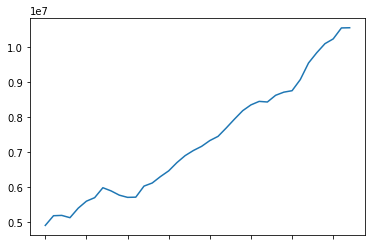

In [194]:
df.sum(axis=0).plot()

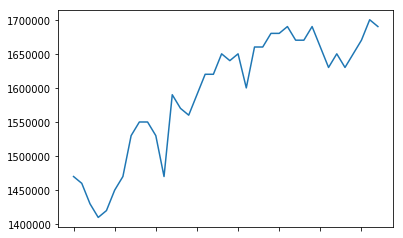

In [195]:
df.loc['United States'].plot()

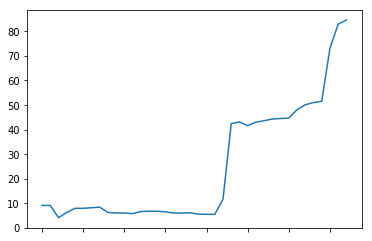

In [196]:
df.loc[df['2009'].idxmin()].plot()

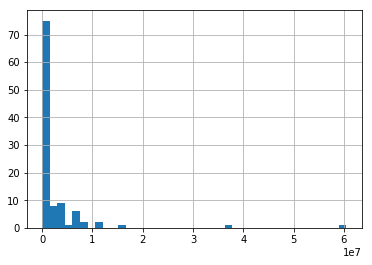

In [197]:
df.sum(axis=1).hist(bins=40)

In [198]:
df[df.sum(axis=1)>1e7]

,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
country,,,,,,,,,,,,,,,,,,,,,
Canada,177000.0,198000.0,192000.0,188000.0,182000.0,190000.0,191000.0,210000.0,207000.0,201000.0,...,373000.0,377000.0,384000.0,386000.0,398000.0,401000.0,411000.0,416000.0,406000.0,390000.0
China,415000.0,431000.0,446000.0,497000.0,512000.0,556000.0,604000.0,619000.0,616000.0,612000.0,...,1060000.0,1090000.0,1170000.0,1320000.0,1490000.0,1620000.0,1730000.0,1820000.0,1990000.0,2090000.0
India,146000.0,149000.0,157000.0,166000.0,170000.0,174000.0,178000.0,181000.0,187000.0,200000.0,...,366000.0,375000.0,384000.0,396000.0,410000.0,422000.0,438000.0,453000.0,468000.0,503000.0
Saudi Arabia,308000.0,389000.0,435000.0,365000.0,444000.0,475000.0,437000.0,497000.0,534000.0,531000.0,...,479000.0,470000.0,440000.0,515000.0,553000.0,581000.0,576000.0,555000.0,579000.0,528000.0
United States,1470000.0,1460000.0,1430000.0,1410000.0,1420000.0,1450000.0,1470000.0,1530000.0,1550000.0,1550000.0,...,1670000.0,1690000.0,1660000.0,1630000.0,1650000.0,1630000.0,1650000.0,1670000.0,1700000.0,1690000.0


In [199]:
df.loc[df.sum(axis=1).sort_values(ascending=False).index]

,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
country,,,,,,,,,,,,,,,,,,,,,
United States,1470000.000,1460000.000,1430000.000,1410000.000,1420000.00,1450000.000,1470000.000,1530000.000,1550000.000,1550000.000,...,1670000.0,1690000.0,1660000.0,1630000.0,1650000.0,1630000.0,1650000.0,1670000.0,1700000.0,1690000.0
China,415000.000,431000.000,446000.000,497000.000,512000.00,556000.000,604000.000,619000.000,616000.000,612000.000,...,1060000.0,1090000.0,1170000.0,1320000.0,1490000.0,1620000.0,1730000.0,1820000.0,1990000.0,2090000.0
Saudi Arabia,308000.000,389000.000,435000.000,365000.000,444000.00,475000.000,437000.000,497000.000,534000.000,531000.000,...,479000.0,470000.0,440000.0,515000.0,553000.0,581000.0,576000.0,555000.0,579000.0,528000.0
India,146000.000,149000.000,157000.000,166000.000,170000.00,174000.000,178000.000,181000.000,187000.000,200000.000,...,366000.0,375000.0,384000.0,396000.0,410000.0,422000.0,438000.0,453000.0,468000.0,503000.0
Canada,177000.000,198000.000,192000.000,188000.000,182000.00,190000.000,191000.000,210000.000,207000.000,201000.000,...,373000.0,377000.0,384000.0,386000.0,398000.0,401000.0,411000.0,416000.0,406000.0,390000.0
Iran,267000.000,310000.000,319000.000,285000.000,313000.00,301000.000,277000.000,172000.000,80800.000,79400.000,...,267000.0,260000.0,265000.0,295000.0,307000.0,318000.0,329000.0,345000.0,345000.0,350000.0
United Kingdom,101000.000,109000.000,103000.000,115000.000,127000.00,155000.000,167000.000,193000.000,198000.000,207000.000,...,273000.0,262000.0,258000.0,247000.0,226000.0,205000.0,187000.0,177000.0,167000.0,159000.0
Indonesia,81700.000,94900.000,97000.000,94300.000,106000.00,118000.000,120000.000,122000.000,126000.000,128000.000,...,236000.0,242000.0,248000.0,255000.0,265000.0,280000.0,314000.0,318000.0,324000.0,352000.0
Mexico,45100.000,47300.000,55200.000,63000.000,67900.00,79200.000,95000.000,114000.000,147000.000,171000.000,...,222000.0,226000.0,226000.0,237000.0,247000.0,254000.0,251000.0,244000.0,233000.0,220000.0


In [200]:
df.rename(columns=lambda x: int(x), inplace=False).T.rename(columns=lambda x: x.strip().lower().replace(" ", "_"))

country,albania,algeria,angola,argentina,australia,austria,bahrain,bangladesh,belgium,benin,...,turkey,united_arab_emirates,united_kingdom,united_states,uruguay,venezuela,vietnam,yemen,zambia,zimbabwe
1972,2960.0,54700.0,10500.0,31000.0,62400.0,7330.0,10100.0,5040.0,6570.0,1020.0,...,15100.0,59800.0,101000.0,1470000.0,493.0,192000.0,13900.0,50.1,3050.0,5020.0
1973,3000.0,56500.0,11700.0,30500.0,68000.0,7920.0,10800.0,5340.0,6510.0,1040.0,...,15500.0,76100.0,109000.0,1460000.0,538.0,203000.0,14800.0,50.1,3120.0,5280.0
1974,2710.0,53300.0,12100.0,30900.0,67500.0,7820.0,11500.0,5480.0,6160.0,1060.0,...,15900.0,83300.0,103000.0,1430000.0,525.0,182000.0,15700.0,51.6,3360.0,5450.0
1975,2910.0,53000.0,11400.0,30600.0,75000.0,7810.0,9960.0,5460.0,7970.0,1090.0,...,16300.0,84400.0,115000.0,1410000.0,521.0,145000.0,16700.0,53.0,3470.0,5360.0
1976,3080.0,58800.0,11200.0,31000.0,75300.0,7240.0,10300.0,5780.0,8680.0,1110.0,...,16600.0,97000.0,127000.0,1420000.0,537.0,143000.0,17200.0,54.5,3610.0,5740.0
1977,3170.0,62100.0,10700.0,32700.0,82300.0,7670.0,12000.0,6020.0,9060.0,1130.0,...,16900.0,101000.0,155000.0,1450000.0,580.0,141000.0,17900.0,55.9,3800.0,5620.0
1978,3480.0,69500.0,10200.0,33900.0,81600.0,7830.0,11700.0,6180.0,8280.0,1160.0,...,17600.0,94600.0,167000.0,1470000.0,595.0,137000.0,18100.0,57.3,3800.0,5590.0
1979,3390.0,75800.0,11000.0,36400.0,86500.0,8010.0,12100.0,6400.0,7620.0,1180.0,...,17400.0,95400.0,193000.0,1530000.0,566.0,150000.0,18200.0,58.7,3890.0,5740.0
1980,3430.0,65700.0,11300.0,38800.0,85400.0,7630.0,12000.0,6750.0,8090.0,1210.0,...,17100.0,90200.0,198000.0,1550000.0,766.0,140000.0,18400.0,60.2,4030.0,5790.0
1981,2690.0,67200.0,10300.0,39500.0,97200.0,7410.0,13000.0,6880.0,8180.0,1460.0,...,18100.0,82500.0,207000.0,1550000.0,838.0,136000.0,19100.0,61.6,4160.0,5690.0
